In [1]:
!apt-get update --fix-missing

!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

!pip install gym
!pip install free-mujoco-py

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [713 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,859 kB]
Get:13 http://security.ubuntu.com

In [2]:
!pip install --upgrade setuptools==65.5.1
!pip install --upgrade pip wheel==0.38.4
!pip install stable-baselines3==1.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 65.5.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616799 sha256=4858a9e626432c5641f4e413d6638b73a2f10bd8eaba39667e4d1678e9656470
  Stored in directory: /root/.cache/pip/wheels/81/aa/90/b67df76370d3916a2189b662cf48da38ce41a4e7e58b6abff5
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Su

Set up the custom Hopper environment and provided util functions



1.   Upload `custom_hopper.zip` to the current session's file storage
2.   Un-zip it by running cell below


In [3]:
!unzip -o custom_hopper.zip

Archive:  custom_hopper.zip
   creating: env/
  inflating: __MACOSX/._env          
 extracting: env/__init__.py         
  inflating: __MACOSX/env/.___init__.py  
  inflating: env/custom_hopper.py    
  inflating: __MACOSX/env/._custom_hopper.py  
  inflating: env/mujoco_env.py       
  inflating: __MACOSX/env/._mujoco_env.py  
   creating: env/assets/
  inflating: __MACOSX/env/._assets   
  inflating: env/assets/hopper.xml   
  inflating: __MACOSX/env/assets/._hopper.xml  




---



In [1]:
import gym
from env.custom_hopper import *

In [2]:
env_src = gym.make('CustomHopper-source-v0')
env_target = gym.make('CustomHopper-target-v0')

print('State space:', env_src.observation_space)  # state-space
print('Action space:', env_src.action_space)  # action-space
print('Dynamics parameters:', env_src.get_parameters())  # masses of each link of the Hopper

State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
Dynamics parameters: [2.53429174 3.92699082 2.71433605 5.0893801 ]


In [3]:
print(f'Bodies defined in the environment:\n {env_src.sim.model.body_names}\n')
print(f'Mass of all the corresponding bodies:\n {env_src.sim.model.body_mass}\n')
print(f'Number of degrees of freedom (DoFs) of the robot:\n {env_src.sim.model.nv}\n')
print(f'Number of DoFs for each body:\n {env_src.sim.model.body_dofnum}\n')
print(f'Number of actuators:\n {env_src.sim.model.nu}\n')
#Box -> Contiuos action and state spaces
print(f'State space:\n {env_src.observation_space}\n')
print(f'Action space:\n {env_src.action_space}\n')
print(f'Mass of all the bodies of the target:\n {env_target.sim.model.body_mass}\n')

Bodies defined in the environment:
 ('world', 'torso', 'thigh', 'leg', 'foot')

Mass of all the corresponding bodies:
 [0.         2.53429174 3.92699082 2.71433605 5.0893801 ]

Number of degrees of freedom (DoFs) of the robot:
 6

Number of DoFs for each body:
 [0 3 1 1 1]

Number of actuators:
 3

State space:
 Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)

Action space:
 Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)

Mass of all the bodies of the target:
 [0.         3.53429174 3.92699082 2.71433605 5.0893801 ]



In [4]:
## Imports and global variables definition

from stable_baselines3 import PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import matplotlib.pyplot as plt

import os
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy

alg = 'ppo'
train_episodes = 1000000
test_episodes = 50

src_log_dir = "./tmp/gym/src/"
target_log_dir = "./tmp/gym/target/"
os.makedirs(src_log_dir, exist_ok=True)
os.makedirs(target_log_dir, exist_ok=True)
# Logs will be saved in src_log_dir/ (for the source model) and target_log_dir (for the target model)
env_src = Monitor(env_src, src_log_dir)
env_target = Monitor(env_target, target_log_dir)

In [5]:
def create_model(alg, env):
    if alg == 'ppo':
        model = PPO("MlpPolicy", env)
    elif alg == 'sac':
        model = SAC("MlpPolicy", env)
    else:
        raise ValueError(f"RL Algo not supported: {alg}")
    return model

def load_model(alg, env, file):
    if alg == 'ppo':
        model = PPO.load(file, env=env)
    elif alg == 'sac':
        model = SAC.load(file, env=env)
    else:
        raise ValueError(f"RL Algo not supported: {alg}")
    return model

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title)
    plt.show()

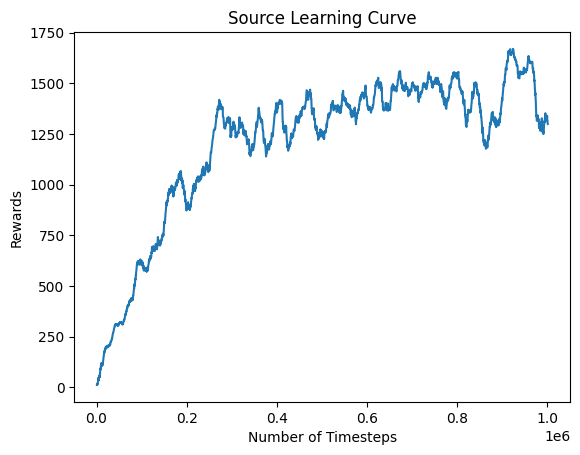

In [10]:
## Train Source Model

try:
    model = create_model(alg, env_src)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('source_model.mdl')
    plot_results(src_log_dir, title="Source Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

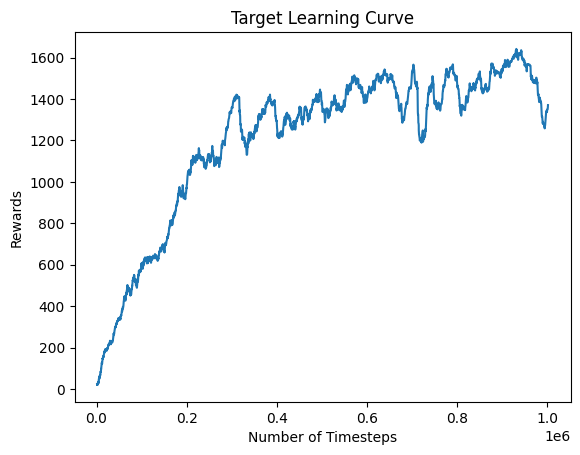

In [11]:
## Train Target Model

try:
    model = create_model(alg, env_target)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('target_model.mdl')
    plot_results(target_log_dir,title="Target Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

Source -> Source
[2.53429174 3.92699082 2.71433605 5.0893801 ]
1660.3662123375036


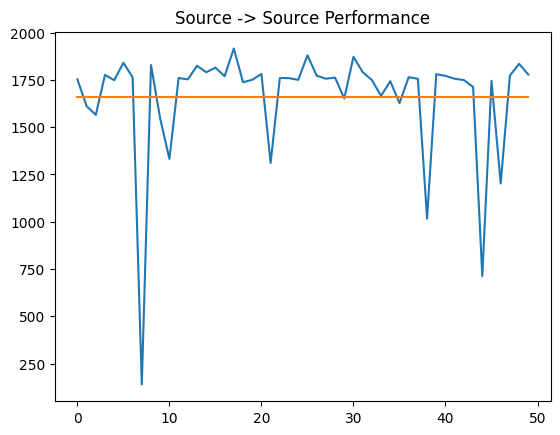

Source -> Target
[3.53429174 3.92699082 2.71433605 5.0893801 ]
708.4198366445504


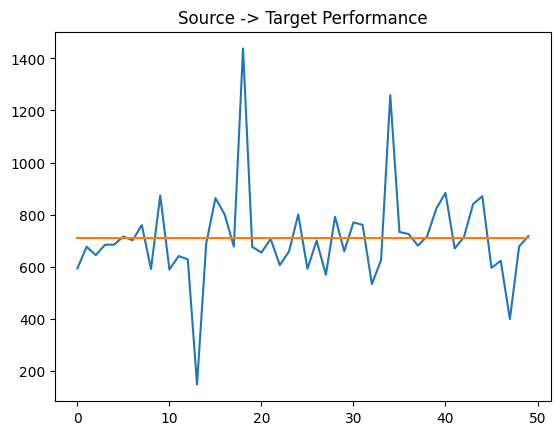

Target -> Target
[3.53429174 3.92699082 2.71433605 5.0893801 ]
1588.1181976969258


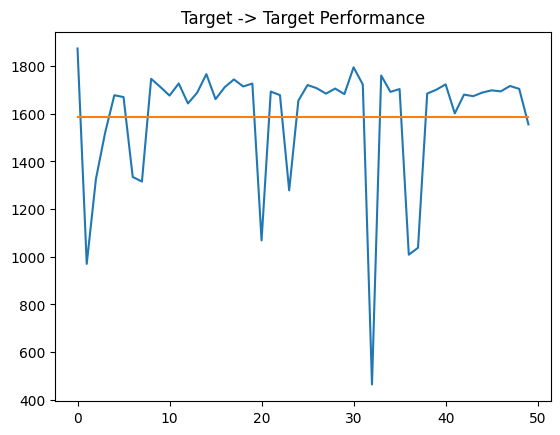

In [6]:
## Policy Evaluation

# Source -> Source
env_src = gym.make('CustomHopper-source-v0')
print('Source -> Source')
model_1 = load_model(alg, env_src, 'source_model.mdl')
print(env_src.get_parameters())
rewards = []
for t in range(test_episodes):
  total_return = 0
  obs = env_src.reset()
  done = False
  steps = 0
  while not done and steps<500:
    action, _ = model_1.predict(obs)
    obs, reward, done, _ = env_src.step(action)
    total_return+=reward
    steps+=1
  rewards.append(total_return)

plt.plot(rewards)
mean_reward = np.mean(np.array(rewards))
print(mean_reward)
plt.plot([mean_reward for _ in range(len(rewards))])
plt.title('Source -> Source Performance')
plt.show()

# Source -> Target
env_target = gym.make('CustomHopper-target-v0')
print('Source -> Target')
model_2 = load_model(alg, env_target, 'source_model.mdl')
print(env_target.get_parameters())
rewards = []
for t in range(test_episodes):
  total_return = 0
  obs = env_target.reset()
  done = False
  steps = 0
  while not done and steps<500:
    action, _ = model_2.predict(obs)
    obs, reward, done, _ = env_target.step(action)
    total_return+=reward
    steps+=1
  rewards.append(total_return)

plt.plot(rewards)
mean_reward = np.mean(np.array(rewards))
print(mean_reward)
plt.plot([mean_reward for _ in range(len(rewards))])
plt.title('Source -> Target Performance')
plt.show()

# Target -> Target
env_target = gym.make('CustomHopper-target-v0')
print('Target -> Target')
model_3 = load_model(alg, env_target, 'target_model.mdl')
print(env_target.get_parameters())
rewards = []
for t in range(test_episodes):
  total_return = 0
  obs = env_target.reset()
  done = False
  steps = 0
  while not done and steps<500:
    action, _ = model_3.predict(obs)
    obs, reward, done, _ = env_target.step(action)
    total_return+=reward
    steps+=1
  rewards.append(total_return)

plt.plot(rewards)
mean_reward = np.mean(np.array(rewards))
print(mean_reward)
plt.plot([mean_reward for _ in range(len(rewards))])
plt.title('Target -> Target Performance')
plt.show()


In [7]:
# Domain Randomization Hopper

env_dr = gym.make('CustomHopper-dr-v0')

dr_log_dir = "./tmp/gym/dr/"
os.makedirs(dr_log_dir, exist_ok=True)
env_dr = Monitor(env_dr, dr_log_dir)

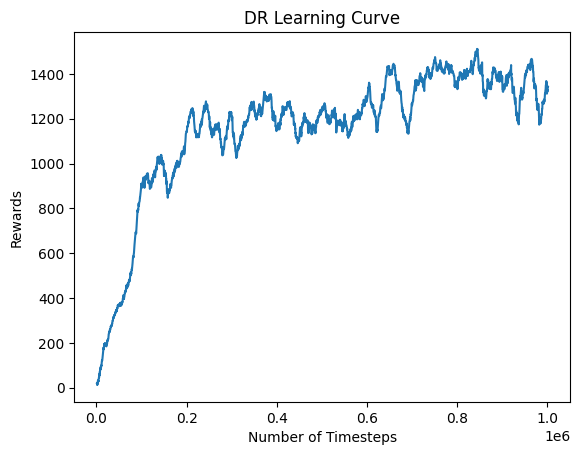

In [8]:
## Train DR Model
try:
    model = create_model(alg, env_dr)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('dr_model.mdl')
    plot_results(dr_log_dir, title="DR Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

[3.53429174 3.92699082 2.71433605 5.0893801 ]
1180.9223558120784


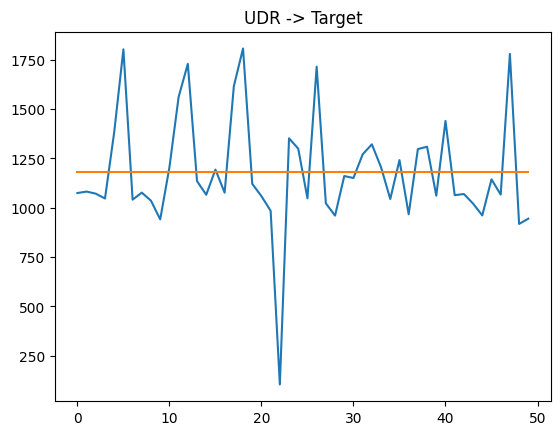

In [9]:
## Policy Evaluation
env_target = gym.make('CustomHopper-target-v0')
model = load_model(alg, env_target, 'dr_model.mdl')
print(env_target.get_parameters())
rewards = []
for t in range(test_episodes):
  total_return = 0
  obs = env_target.reset()
  done = False
  steps = 0
  while not done and steps<500:
    action, _ = model.predict(obs)
    obs, reward, done, _ = env_target.step(action)
    total_return+=reward
    steps+=1
  rewards.append(total_return)

plt.plot(rewards)
mean_reward = np.mean(np.array(rewards))
print(mean_reward)
plt.plot([mean_reward for _ in range(len(rewards))])
plt.title('UDR -> Target')
plt.show()

In [16]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import gym.spaces
import numpy as np

class AdversarialAgent(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self,agent,agent_env,num_ep):

    self.action_space = spaces.Box(
        low=np.array([1.0,1.0,1.0]),
        high=np.array([10.0, 10.0, 10.0])
    )
    # The observation is the reward of the agent trained with the
    # generated masses
    self.observation_space = spaces.Box(
        low = np.array([1.0,1.0,1.0]),
        high=np.array([10.0, 10.0, 10.0])
    )

    #agent to use to generate the reward
    #to update at the end of every cycle
    self.agent = agent
    self.agent_env = agent_env

    #Training parameters
    # - number of episode on which to test the new masses
    self.num_ep = num_ep


  def step(self, action):
    """
    This method is the primary interface between environment and agent.
    """
    generated_masses = action
    returns = []
    #self.agent_env.set_custom_parameters(action)
    for t in range(self.num_ep):
      current_return = 0
      obs = self.agent_env.reset()
      self.agent_env.set_custom_parameters(generated_masses)
      for _ in range(500):
        agent_action, _ = self.agent.predict(obs)
        obs, reward, done, _ = self.agent_env.step(agent_action)
        current_return+=reward
        if done:
          break
      returns.append(current_return)
    #mean_reward, std_reward = evaluate_policy(self.agent,self.agent_env,n_eval_episodes=self.num_ep)
    mean_reward = np.mean(np.array(returns))

    reward = 1/mean_reward
    print(f'{generated_masses}->{mean_reward}->{reward}')

    return np.array([generated_masses],dtype=np.float32), reward, True, {}

  def reset(self):
    """
    This method resets the environment to its initial values.

    Returns:
        observation:    array
                        the initial state of the environment
    """
    #mean_reward, std_reward = evaluate_policy(self.agent,self.agent_env,n_eval_episodes=self.num_ep)
    masses = self.agent_env.get_parameters()
    masses = masses[1:]
    #print(masses)
    return np.array([masses],dtype=np.float32)

  def render(self, mode='human', close=False):
    """
    This methods provides the option to render the environment's behavior to a window
    which should be readable to the human eye if mode is set to 'human'.
    """
    pass

  def close(self):
    """
    This method provides the user with the option to perform any necessary cleanup.
    """
    pass

gym.envs.register(
        id="AdversarialAgent-v0",
        entry_point="%s:AdversarialAgent" % __name__,
        max_episode_steps=10
)

In [17]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import StopTrainingOnMaxEpisodes
from stable_baselines3 import SAC, PPO

agent_env = gym.make('CustomHopper-deception-v0')
model = PPO('MlpPolicy', agent_env)

deception_env = gym.make("AdversarialAgent-v0",agent=model,agent_env=agent_env,num_ep=1)
#check_env(deception_env)

deception = SAC('MlpPolicy', deception_env)

agent_env.set_deceptor(deception)

total_episodes = 0
max_step = 500

callback_max_episodes = StopTrainingOnMaxEpisodes(max_episodes=1)

thighs = []
legs = []
foots = []

while total_episodes<2000:

    #Train deception module
    for i in range(10):
      deception.learn(1, callback_max_episodes)

    #Train Agent
    model.learn(500)

    total_episodes+=1
    print('\n',f'{total_episodes}','\n')

model.save('deception_model_agent_dr.mdl')

[4.894492  9.864971  5.5181084]->19.373486074362845->0.051616936475016306


/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Output streaming troncato alle ultime 5000 righe.
[2.157269  2.9564958 5.188435 ]->1630.213108287836->0.0006134167336258693
[1.6504142 7.7207985 8.442399 ]->1413.7277836540995->0.0007073497540065836
[6.559822 4.062924 9.208477]->1058.159470096786->0.0009450371406764745
[7.3322763 5.461484  3.9995534]->733.6505170300259->0.0013630468142354943
[9.130798  3.2023423 1.9379339]->761.0902943991408->0.0013139045489858356

 1616 

[4.8856883 4.5901656 4.90325  ]->998.2126330668538->0.0010017905673339906
[9.270302  8.232319  6.4174967]->610.8221587867159->0.001637137725956624
[8.128351  3.5513127 9.27929  ]->649.4060385441683->0.0015398686501927048
[9.766152  5.5247555 4.161546 ]->666.6682206176356->0.0014999965036184698
[9.738093  8.232957  2.0468712]->806.0064654980351->0.0012406848366682708
[1.0011072 7.121443  2.6881948]->1616.03296213924->0.0006187992593147605
[1.2714685 3.6876738 8.9887705]->1486.681357541721->0.0006726390930559152
[4.4017124 4.62391   5.2111464]->1415.5108702117277->0.00

[3.53429174 3.92699082 2.71433605 5.0893801 ]
1340.711425267925


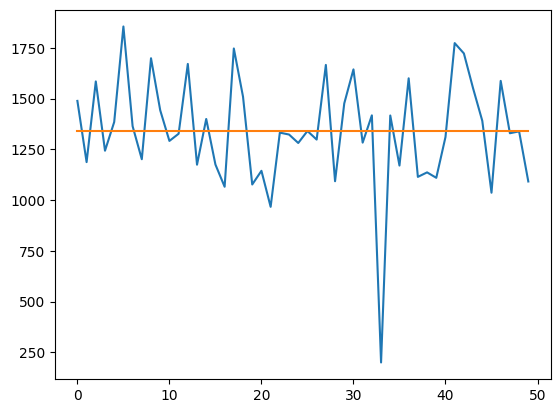

In [10]:
## Policy Evaluation

env_target = gym.make('CustomHopper-target-v0')
model = load_model('ppo', env_target, 'deception_model_agent_dr.mdl')
print(env_target.get_parameters())
rewards = []
for t in range(test_episodes):
  total_return = 0
  obs = env_target.reset()
  done = False
  steps = 0
  while not done and steps<500:
    action, _ = model.predict(obs)
    obs, reward, done, _ = env_target.step(action)
    total_return+=reward
    steps+=1
  rewards.append(total_return)

plt.plot(rewards)
mean_reward = np.mean(np.array(rewards))
print(mean_reward)
plt.plot([mean_reward for _ in range(len(rewards))])
plt.show()